# Appendix - VIII

### Predicting S & P-500 Index Prices using Keras

### A fully connected (multilayer perceptron) neural network with four hidden layers is used.

#### Purpose: according to the dynamics of prices of 500 stocks, to predict the dynamics of prices of futures S&P

##### Exchange minute data in csv (41.266 minutes) includes 500 shares + S & P

In [1]:
from keras.models import Sequential 
from keras.layers import Dense      
                                    
from keras import utils             

import numpy as np                  
import pandas as pd                 

from sklearn.preprocessing import MinMaxScaler  

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
np.random.seed(42)

### Data

In [3]:
data = pd.read_csv('S&P_Data/data_stocks.csv')

print(data)

             DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  \
0      1491226200  2363.6101     42.3300     143.6800     129.6300   
1      1491226260  2364.1001     42.3600     143.7000     130.3200   
2      1491226320  2362.6799     42.3100     143.6901     130.2250   
3      1491226380  2364.3101     42.3700     143.6400     130.0729   
4      1491226440  2364.8501     42.5378     143.6600     129.8800   
...           ...        ...         ...          ...          ...   
41261  1504209360  2472.2200     44.7200     164.1100     155.0900   
41262  1504209420  2471.7700     44.7300     164.1200     155.1600   
41263  1504209480  2470.0300     44.7400     164.0100     155.0650   
41264  1504209540  2471.4900     44.7100     163.8800     154.9600   
41265  1504209600  2471.4900     44.7400     163.9800     155.1600   

       NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  \
0          82.040    102.2300      85.2200       59.760      121.520  ...   
1    

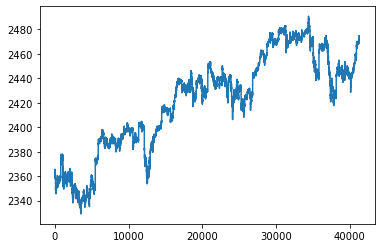

In [4]:
plt.plot(data['SP500'])
plt.show()

In [5]:
data_m = data.drop(['DATE'], 1) 
                      

In [6]:
n = data_m.shape[0]   
p = data_m.shape[1]   

data_a = np.array(data_m)

print(data_a)

print("data_a:")
print("n = ", n, " p = ", p)
print("type: ", data_a.dtype, type(data_a), "; Size: ", data_a.shape)

[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]
data_a:
n =  41266  p =  501
type:  float64 <class 'numpy.ndarray'> ; Size:  (41266, 501)


##### target: predicting the value of the S & P-500 index in the near future (in our example, the S & P-500 value in the next minute). To do this, shift the S & P-500 forward one minute

In [7]:
# shift the values of the column 'SP500' one line up
for i in range(n-1):
    data_a[i,0] = data_a[i+1,0]

print(data_a)

print("data_a")
print("n = ", n, " p = ", p)
print("type ", data_a.dtype, type(data_a), "; Size: ", data_a.shape)

[[2364.1001   42.33    143.68   ...   63.86    122.       53.35  ]
 [2362.6799   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2364.3101   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]
data_a
n =  41266  p =  501
type  float64 <class 'numpy.ndarray'> ; Size:  (41266, 501)


In [8]:
print(data_a[-5:,:]) 

[[2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]


In [9]:
# delete the last row of the array, because for it we do not have the S & P-500 value in the next minute
data_a = np.delete(data_a,(n-1), axis=0)

print(data_a[-5:,:])

print("data_a")
print("type ", data_a.dtype, type(data_a), "; Size: ", data_a.shape)

[[2472.22     44.71    164.14   ...   76.885   114.3      62.73  ]
 [2471.77     44.72    164.11   ...   76.88    114.31     62.725 ]
 [2470.03     44.73    164.12   ...   76.9     114.33     62.71  ]
 [2471.49     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]]
data_a
type  float64 <class 'numpy.ndarray'> ; Size:  (41265, 501)


### Data for testing

In [10]:
# We allocate approximately 80% of the data (rows) for training and approximately 20% of the data (rows) are reserved for testing
n = data_a.shape[0] 
train_start = 0
train_end = int(np.floor(0.8*n))
print(train_end)

33012


In [11]:

train_end -= 12
print(train_end)

33000


In [12]:
test_start = train_end + 1
test_end = n

# divide the data array into two unequal parts
data_train = data_a[np.arange(train_start, train_end), :]
data_test = data_a[np.arange(test_start, test_end), :]

In [13]:
print('Data for training:')
print(data_train.shape)
print('Data for testing:')
print(data_test.shape)

Data for training:
(33000, 501)
Data for testing:
(8264, 501)


### Data normalisation

In [14]:
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

print('Data for training ',"data_train:")
print("Type: ", data_train.dtype, type(data_train), "; Size: ", data_train.shape)

print("\n",'Data or testing ',"data_test:")
print("Type: ", data_test.dtype,  type(data_test), "; Size: ", data_test.shape)


Data for training  data_train:
Type:  float64 <class 'numpy.ndarray'> ; Size:  (33000, 501)

 Data or testing  data_test:
Type:  float64 <class 'numpy.ndarray'> ; Size:  (8264, 501)


#### create a matrix of input parameters and a response vector for training and test parts

In [16]:
# create two data sets: for training: (X_train, y_train)
# and for tests: (X_test, y_test)
# X_train and X_test are tables with minute stock prices
# y_train and y_test are S & P-500 values in the next minute

In [15]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [16]:
# print X_train, y_train, X_test and y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype, type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype, type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype,type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype, type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float64 <class 'numpy.ndarray'> ; Size:  (33000, 500)

 y_train:
Type:  float64 <class 'numpy.ndarray'> ; Size:  (33000,)
Data for testing:

 X_test:
Type:  float64 <class 'numpy.ndarray'> ; Size:  (8264, 500)

 y_test:
Type:  float64 <class 'numpy.ndarray'> ; Size:  (8264,)


### create Neural Network

In [17]:
model = Sequential() 

model.add(Dense(1024, input_dim=500, activation="relu", kernel_initializer="normal"))

model.add(Dense(512, activation="relu", kernel_initializer="normal"))

model.add(Dense(256, activation="relu", kernel_initializer="normal"))

model.add(Dense(128, activation="relu", kernel_initializer="normal"))

model.add(Dense(1))  

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              513024    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,202,177
Trainable params: 1,202,177
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [18]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

### Training NN

In [19]:
 
history = model.fit(X_train, y_train, batch_size=2, epochs=15, validation_split=0.2, verbose=1)

Train on 26400 samples, validate on 6600 samples
Epoch 1/15
26400/26400 [==============================] - 48s 2ms/step - loss: 8.3030e-04 - mae: 0.0184 - val_loss: 0.0071 - val_mae: 0.0768
Epoch 2/15
26400/26400 [==============================] - 47s 2ms/step - loss: 1.6087e-04 - mae: 0.0096 - val_loss: 0.0032 - val_mae: 0.0521
Epoch 3/15
26400/26400 [==============================] - 49s 2ms/step - loss: 1.0910e-04 - mae: 0.0079 - val_loss: 0.0017 - val_mae: 0.0372
Epoch 4/15
26400/26400 [==============================] - 48s 2ms/step - loss: 9.0482e-05 - mae: 0.0072 - val_loss: 0.0020 - val_mae: 0.0412
Epoch 5/15
26400/26400 [==============================] - 47s 2ms/step - loss: 8.5976e-05 - mae: 0.0070 - val_loss: 7.7292e-04 - val_mae: 0.0241
Epoch 6/15
26400/26400 [==============================] - 47s 2ms/step - loss: 7.8457e-05 - mae: 0.0067 - val_loss: 5.6890e-04 - val_mae: 0.0199
Epoch 7/15
26400/26400 [==============================] - 47s 2ms/step - loss: 7.6018e-05 - mae: 

### Evaluation

In [21]:
# Оцениваем качество обучения сети на тестовых данных (которые сеть НЕ видела)
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print("Mean absolute error: %.2f%%" % (mae*100))

Mean absolute error: 4.04%


### Training accuracy graphs

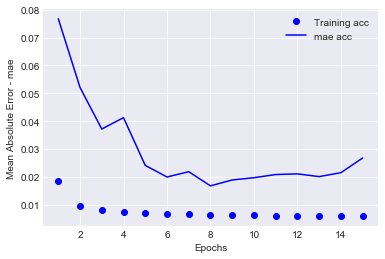

In [25]:
history_dict = history.history
mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training acc')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='mae acc')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

### Using neural networks to predict the price of the S & P-500

In [26]:
import random

pred = model.predict(X_test)

n_rec = random.randint(0, X_test.shape[0])

print("Predicted price:", pred[n_rec][0], ", the right price:", y_test[n_rec], ", error:", pred[n_rec][0]-y_test[n_rec], 
      "%error:", (pred[n_rec][0]-y_test[n_rec])/y_test[n_rec]*100,"%")

Predicted price: 0.9195916 , the right price: 0.8870742378530725 , error: 0.03251736781022707 %error: 3.6656873148437636 %


### Price chart

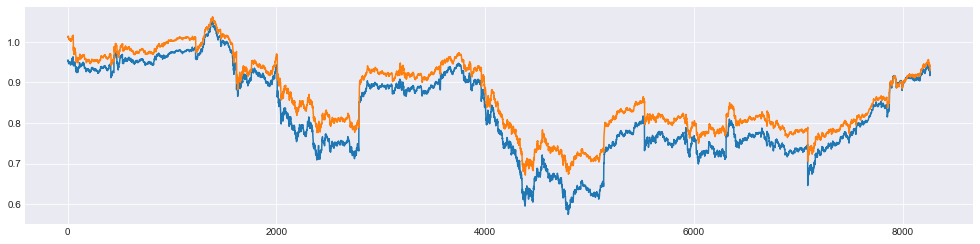

In [27]:
plt.style.use('seaborn-darkgrid') 
fig = plt.figure(figsize=(17,4)) 
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(pred[:,0])
plt.show()

### Error Chart

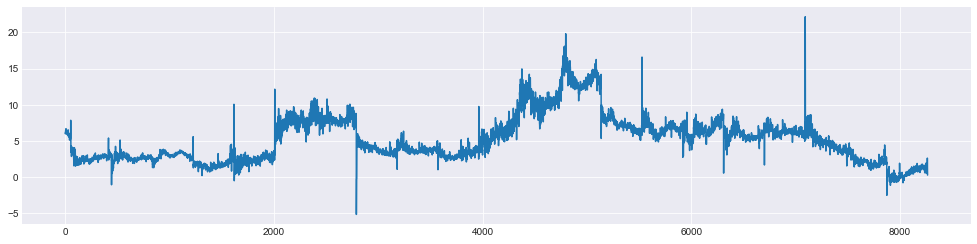

In [28]:
plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(17,4)) 
ax1 = fig.add_subplot(111)
a = (pred[:,0]-y_test[:])/y_test[:]*100
line1, = ax1.plot(a)
plt.show()